In [1]:
#from collections import defaultdict

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from Bio.PopGen.GenePop import Controller as gpc
%matplotlib inline

In [2]:
my_pops = [l.rstrip() for l in open('hapmap10_auto_noofs_2.pops')]
num_pops = len(my_pops)

In [3]:
ctrl = gpc.GenePopController()

In [4]:
(multi_fis, multi_fst, multi_fit), f_iter = ctrl.calc_fst_all('hapmap10_auto_noofs_2.gp')

In [5]:
print(multi_fis, multi_fst, multi_fit)

(0.0004, 0.1078, 0.1082)


In [6]:
fst_vals = []
fis_vals = []
fit_vals = []
for f_case in f_iter:
    name, fis, fst, fit, qinter, qintra = f_case
    fst_vals.append(fst)
    fis_vals.append(fis)
    fit_vals.append(fit)

(-0.1, 0.4)

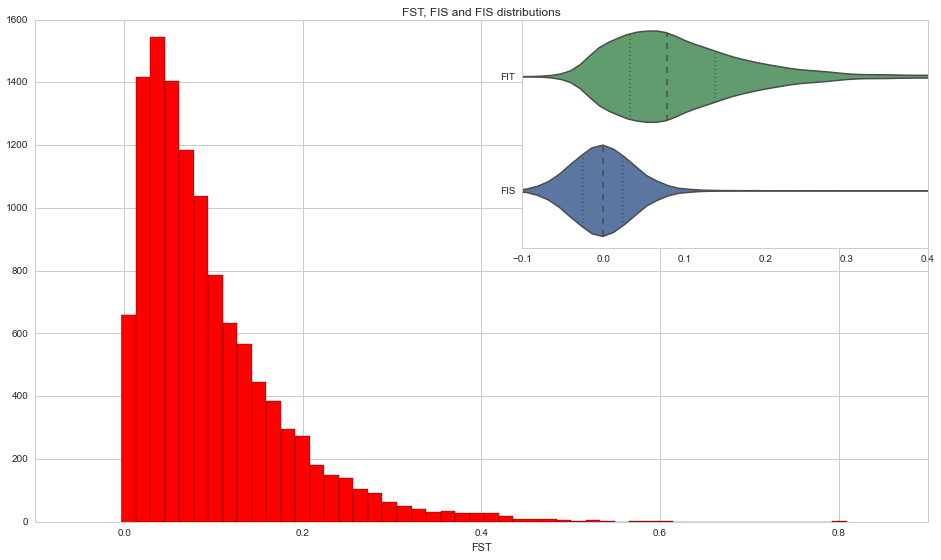

In [15]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)
ax.hist(fst_vals, 50, color='r')
ax.set_title('FST, FIS and FIS distributions')
ax.set_xlabel('FST')
ax = fig.add_subplot(2, 2, 2)
sns.violinplot([fis_vals, fit_vals], ax=ax, vert=False)
ax.set_yticklabels(['FIS', 'FIT'])
ax.set_xlim(-.1, 0.4)

In [8]:
fpair_iter, avg = ctrl.calc_fst_pair('hapmap10_auto_noofs_2.gp')

In [9]:
min_pair = min(avg.values())
max_pair = max(avg.values())
arr = np.ones((num_pops - 1, num_pops - 1, 3), dtype=float)

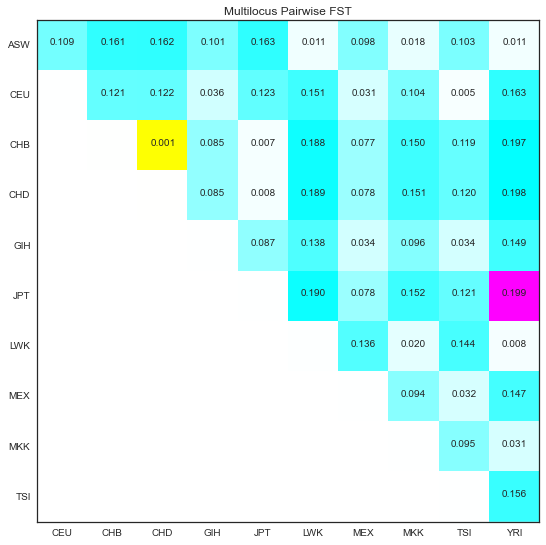

In [17]:
sns.set_style("white")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
for row in range(num_pops - 1):
    for col in range(row + 1, num_pops):
        val = avg[(col, row)]
        norm_val = (val - min_pair) / (max_pair - min_pair)
        ax.text(col - 1, row, '%.3f' % val, ha='center')
        if norm_val == 0.0:
            arr[row, col - 1, 0] = 1
            arr[row, col - 1, 1] = 1
            arr[row, col - 1, 2] = 0
        elif norm_val == 1.0:
            arr[row, col - 1, 0] = 1
            arr[row, col - 1, 1] = 0
            arr[row, col - 1, 2] = 1
        else:
            arr[row, col - 1, 0] = 1 - norm_val
            arr[row, col - 1, 1] = 1
            arr[row, col - 1, 2] = 1
ax.imshow(arr, interpolation='none')
ax.set_title('Multilocus Pairwise FST')
ax.set_xticks(range(num_pops - 1))
ax.set_xticklabels(my_pops[1:])
ax.set_yticks(range(num_pops - 1))
ax.set_yticklabels(my_pops[:-1])

In [11]:
pop_ceu = my_pops.index('CEU')
pop_yri = my_pops.index('YRI')
start_pos = 136261886  # b36
end_pos = 136350481
all_fsts = []
inside_fsts = []
for locus_pfst in fpair_iter:
    name = locus_pfst[0]
    pfst = locus_pfst[1]
    pos = int(name.split('/')[-1])  # dependent
    my_fst = pfst[(pop_yri, pop_ceu)]
    if my_fst == '-':  # Can be this
        continue
    all_fsts.append(my_fst)
    if pos >= start_pos and pos <= end_pos:
        inside_fsts.append(my_fst)

In [12]:
print(inside_fsts)
print('%.2f/%.2f/%.2f' % (np.median(all_fsts), np.mean(all_fsts), np.percentile(all_fsts, 90)))

[0.1346, 0.6703, 0.7317, 0.1432, 0.2485]
0.08/0.13/0.33


In [13]:
100 * (end_pos - start_pos) / 242000000.0

0.03660950413223141